Following tutorial at 
https://github.com/jaleesr/SenePy/blob/main/EXAMPLE_OIS_hepatocytes.ipynb

In [ ]:
import os
import senepy as sp
import anndata
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np

from src.hlca import HLCA

In [2]:
hubs = sp.load_hubs(species='Human')

In [ ]:
hubs.metadata[hubs.metadata.tissue == 'lung']

,tissue,cell,hub_num,size,n_sen,hyp
42,lung,basal cell,0,1966,25,1.793375e-02
43,lung,ciliated epithelial cell,0,218,3,2.645555e-01
44,lung,club cell,0,937,14,2.212692e-02
45,lung,endothelial cell,0,137,2,3.090153e-01
46,lung,endothelial cell,1,23,0,1.000000e+00
47,lung,fibroblast,0,35,0,1.000000e+00
48,lung,fibroblast,1,556,4,6.704579e-01
49,lung,macrophage,0,55,0,1.000000e+00
50,lung,macrophage,1,268,19,8.432322e-13
51,lung,monocyte,0,404,18,6.502775e-09


In [4]:
hubs.metadata.tissue.unique()

array(['blood', 'bone marrow', 'heart', 'hippocampus', 'intestine',
       'kidney', 'liver', 'lung', 'skin', 'tongue'], dtype=object)

In [ ]:
hlca = HLCA(os.path.expanduser('~/data/CompBio/HLCA-upd.h5ad'), remove_nan_age=True, remove_smokers=True)
adata = hlca.adata

Removing 3427 cells with age='NaN'
Removing 279726 cells from smokers


In [29]:
adata.var.set_index('feature_name', inplace=True)

/Users/euxhenh/micromamba/envs/ml12/lib/python3.12/site-packages/pandas/core/frame.py:6191: ImplicitModificationWarning: Trying to modify index of attribute `.var` of view, initializing view as actual.
  frame.index = index


In [30]:
translator = sp.translator(hub=hubs.hubs, data=adata)

809 of 41741 genes not initially present
195 of 809 translated
614 still not present


In [ ]:
merge_results = hubs.merge_hubs(hubs.metadata[hubs.metadata.tissue == 'lung'], new_name='Universal',
                calculate_thresh=True, p_thres=0.01)

merge_results.head()

A gene will occur 2 times at 0.44% chance
Threfore 2 is the calculated_threshold


,Gene,Count,p value,q value
0,MMP9,7,8.529843e-13,1.099212e-09
1,MZB1,7,8.529843e-13,1.099212e-09
2,CHI3L1,7,8.529843e-13,1.099212e-09
3,IGLC3,6,1.411035e-10,4.959145e-08
4,TXNDC5,6,1.411035e-10,4.959145e-08


In [88]:
pd.DataFrame(hubs.hubs['Universal']).to_csv('SenePy_Lung_Universal.csv')

In [34]:
adata.obs['Universal_score'] = sp.score_hub(adata, hubs.hubs['Universal'], translator=translator)

1162/1172(99.15%) genes present in data
1167/1172(99.57%) genes present in data after translation
Still not present: ['FAM153B', 'WDR66', 'HIST1H2BD', 'CCDC58', 'ARHGAP11B']


In [37]:
adata.obs['Universal_score'].to_csv('SenePy_score.csv')

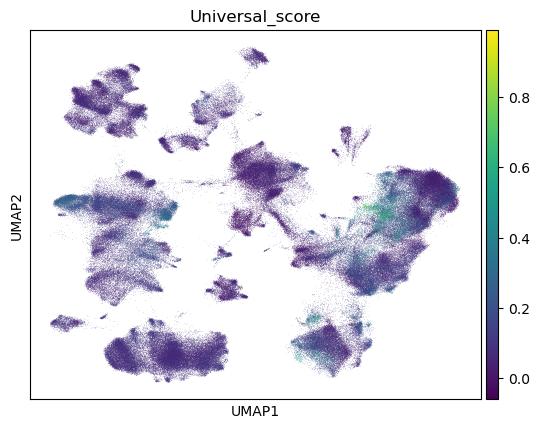

In [46]:
sc.pl.umap(adata, color='Universal_score')